<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Pesquisa-PID/Estudo-Descritivo/COVID_BRASIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e Dados

In [1]:
#Importando as Bibliotecas para Estudo.
import pandas as pd
import numpy as np

In [12]:
#Importando os Dados.
df = pd.read_csv('covid-dados-br.csv')

# Visualizando e Manipulando os Dados

In [13]:
#Visualizando às 5 primeiras linhas do Data Frame.
df.head() 

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,26,2020-06-25,89,AC,Acrelândia,1200013.0,city,185,1212.63765,0,3,0,0.0162,15256.0,True,False
1,26,2020-06-25,56,AC,Assis Brasil,1200054.0,city,147,1981.93340,0,5,0,0.0340,7417.0,True,False
2,26,2020-06-25,48,AC,Brasiléia,1200104.0,city,287,1092.16835,0,6,0,0.0209,26278.0,True,False
3,26,2020-06-25,79,AC,Bujari,1200138.0,city,151,1470.87473,2,3,2,0.0199,10266.0,True,False
4,26,2020-06-25,49,AC,Capixaba,1200179.0,city,128,1090.94008,6,5,0,0.0391,11733.0,True,False


In [14]:
#Função do Pandas para filtrar features específicas. Armazenando-as em um novo Data Frame.
states = df.loc[df.place_type== 'state', :]
#Filtrando somente os dados sobre os Estados.
states.head()

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
22,26,2020-06-25,101,AC,NaN,12.0,state,12304,1395.11415,282,335,9,0.0272,881935.0,True,False
126,26,2020-06-25,110,AL,NaN,27.0,state,32065,960.79023,835,958,20,0.0299,3337357.0,True,False
188,26,2020-06-25,105,AM,NaN,13.0,state,67267,1623.00460,503,2731,21,0.0406,4144597.0,True,False
205,26,2020-06-25,98,AP,NaN,16.0,state,27415,3241.57445,496,394,7,0.0144,845731.0,True,False
586,26,2020-06-25,112,BA,NaN,29.0,state,54291,365.02902,2360,1601,60,0.0295,14873064.0,True,False


In [15]:
#Método para verificar os objetos únicos no DataFrame, nesse caso são os Estados.
states.state.unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [16]:
#Método para verificar a quantidade de objetos únicos, nesse caso o número de estados, que é equivalente ao número de estados do Brasil em que foram registados Casos de Covid-19.
len(states.state.unique())

27

In [18]:
#Método para Desestruturar um DataFrame e selecionar apenas as colunas de interesse, criando um novo DataFrame a partir das mesmas.
data = states[['date', 'state', 'last_available_confirmed', 'last_available_deaths', 'is_last']]

In [19]:
#Visualizando às 5 primeiras linhas dos dados.
data.head()

,date,state,last_available_confirmed,last_available_deaths,is_last
22,2020-06-25,AC,12304,335,True
126,2020-06-25,AL,32065,958,True
188,2020-06-25,AM,67267,2731,True
205,2020-06-25,AP,27415,394,True
586,2020-06-25,BA,54291,1601,True


In [20]:
#Criando um Data Frame vazio.
covid = pd.DataFrame()

In [24]:
#Criação de variáveis locais p/ manipulação futura.
state = "SP"
situation = "last_available_confirmed"

In [25]:
#Criação de novo DataFrame correlacionando apenas um estado em específico (Variável state).
data_state =  data.loc[data.state == state, :]
data_state.head()

,date,state,last_available_confirmed,last_available_deaths,is_last
4916,2020-06-25,SP,248587,13759,True
9954,2020-06-24,SP,238822,13352,False
14976,2020-06-23,SP,229475,13068,False
19968,2020-06-22,SP,221973,12634,False
24943,2020-06-21,SP,219185,12588,False


In [26]:
#Reestruturar DataFrame agrupando as variáveis de Data e o Somatório de Casos Confirmados, mostrando a evolução ao longo dos dias.
data_state = data_state.groupby('date').sum()[situation].reset_index()
data_state

,date,last_available_confirmed
0,2020-02-25,1
1,2020-02-26,1
2,2020-02-27,1
3,2020-02-28,2
4,2020-02-29,2
...,...,...
117,2020-06-21,219185
118,2020-06-22,221973
119,2020-06-23,229475
120,2020-06-24,238822


In [28]:
#Removendo a coluna Date por questão de influência no estudo.
data_state = data_state.drop(columns=['date'])

In [29]:
#Renomeando a coluna no DataFrame e exibindo o Estado correspondente.
data_state.columns = [state]
data_state

,SP
0,1
1,1
2,1
3,2
4,2
...,...
117,219185
118,221973
119,229475
120,238822


In [30]:
#Concatenando dois DataFrames
covid = pd.concat([covid, data_state], ignore_index=False, axis=1)
covid

,SP
0,1
1,1
2,1
3,2
4,2
...,...
117,219185
118,221973
119,229475
120,238822


In [31]:
#Processo Geral p/ Criação do DataFrame com os número de casos por estados e os dias respectivos:

#Defino o Estado e Tipo de Caso
state = "RJ"
situation = "last_available_confirmed"
#Manipulo o DataFrame para relacionar somente o estado, com o número acumulado de casos confirmados
data_state =  data.loc[data.state == state, :]
data_state = data_state.groupby('date').sum()[situation].reset_index()
#Retiro a Coluna de Date e renomeio a coluna com a Sigla do Estado
data_state = data_state.drop(columns=['date'])
data_state.columns = [state]
#Faço a concatenação entre o DataFrame covid e o data_state com o estado
covid = pd.concat([covid, data_state], ignore_index=False, axis=1)
covid

,SP,RJ
0,1,1.0
1,1,2.0
2,1,2.0
3,2,3.0
4,2,3.0
...,...,...
117,219185,NaN
118,221973,NaN
119,229475,NaN
120,238822,NaN


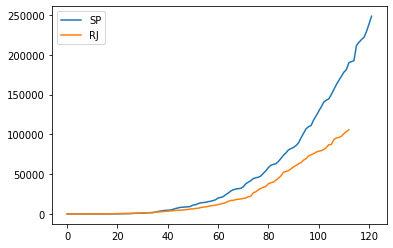

In [32]:
#Plotando Gráfico de Linha para comparação entre os estados.
covid.plot()

# Automatizando o Processo e Comparando Dados

In [33]:
#Processo Geral p/ Criação do DataFrame com os número de casos por estados e os dias respectivos, função Generalizada:
def since_the_first (data, states, days, situation):

  covid = pd.DataFrame()

  for state in states:
    try:
       data_state =  data.loc[data.state == state, : ]
       data_state = data_state.groupby('date').sum()[situation].reset_index()
       data_state = data_state.drop(columns=['date'])
       data_state.columns = [state]
       covid = pd.concat([covid, data_state], ignore_index=False, axis=1)

    except: 
      print('Is not ' + situation + 'in' + state)

  covid.columns = states

  return covid.head(days)

In [36]:
#Casos Confirmados em comparação nos três estados, SP, RJ E CE.
data_state = since_the_first(data, ['SP', 'RJ', 'CE'], 110, 'last_available_confirmed')
data_state

,SP,RJ,CE
0,1,1.0,9.0
1,1,2.0,10.0
2,1,2.0,19.0
3,2,3.0,24.0
4,2,3.0,68.0
...,...,...,...
105,150138,87317.0,NaN
106,156316,93378.0,NaN
107,162520,95537.0,NaN
108,167900,96133.0,NaN


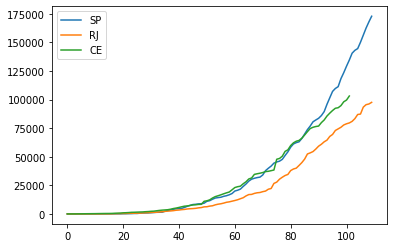

In [37]:
#Plotando o Gráfico Linear para comparação do número de casos nos três estados [SP, CE, RJ].
data_state.plot()

In [38]:
#Mortes em comparação nos três estados, SP, RJ E CE
data_state = since_the_first(data, ['SP', 'RJ', 'CE'], 110, 'last_available_deaths')
data_state

,SP,RJ,CE
0,0,0.0,0.0
1,0,0.0,0.0
2,0,0.0,0.0
3,0,0.0,0.0
4,0,0.0,0.0
...,...,...,...
105,9522,8412.0,NaN
106,9862,8595.0,NaN
107,10145,8824.0,NaN
108,10368,8875.0,NaN


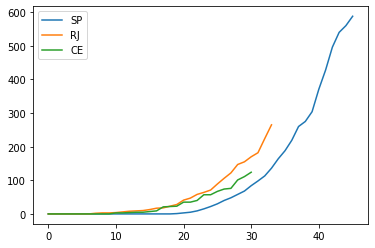

In [ ]:
#Plotando o Gráfico Linear para comparação do número de mortes nos três estados [SP, CE, RJ].
data_state.plot()

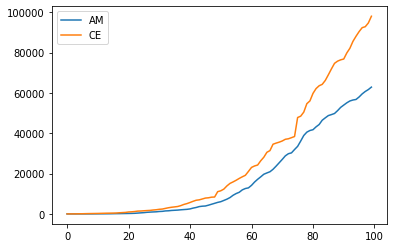

In [39]:
#Repetindo o processo para comparação entre diferentes estados.
data_state = since_the_first(data, ['AM', 'CE'], 100, 'last_available_confirmed')
data_state.plot()

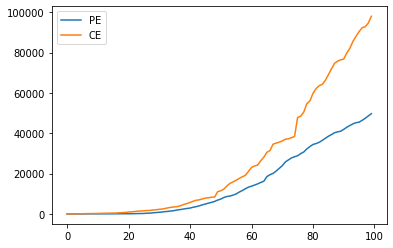

In [40]:
data_state = since_the_first(data, ['PE', 'CE'], 100, 'last_available_confirmed')
data_state.plot()

# Estudando a Correlação entre os Dados

In [47]:
df_correlation = pd.DataFrame()

In [48]:
#Correlação entre Casos e Mortes utilizando Coeficiente de Correlação de Pearson.
sp_confirmed = since_the_first(data, ['SP'], 110, 'last_available_confirmed')
sp_deaths = since_the_first(data, ['SP'], 110, 'last_available_deaths')

In [49]:
df_correlation  = pd.concat([df_correlation, sp_confirmed, sp_deaths], ignore_index=True, axis=1)

In [50]:
#Renomeando as Colunas do Data Frame, relativo aos Casos confirmados e as Mortes.
df_correlation.columns = ['Cases', 'Deaths']
df_correlation

,Cases,Deaths
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0
...,...,...
105,150138,9522
106,156316,9862
107,162520,10145
108,167900,10368


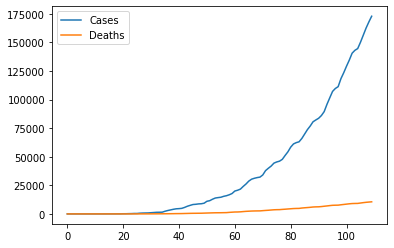

In [51]:
#Plotando Gráfico Comparativo (Casos / Mortes) no mesmo Estado.
df_correlation.plot()

Será utilizado o método de Pearson para identificar a correlação entre as duas variáveis.


**Se as duas variáveis possuem o mesmo tipo de comportamento (ex: uma sobe e a outra sobe, ou uma sobe e a outra desce = correlação positiva).**

**Se as duas variáveis possuem o diferentes tipos de comportamento (ex: uma sobe e a outra desce, ou uma desce e a outra sobe = correlação negativa).**

In [57]:
df_correlation.corr(method="pearson")

,Cases,Deaths
Cases,1.000000,0.994065
Deaths,0.994065,1.000000


**É possível verificar a alta correlação positiva, sinalizando uma possibilidade: Quantos mais casos confirmados, mais mortes.**

No entanto, apenas pelo coeficiente de correlação não é possível fazer afirmações como essa, mesmo que o cenário parece "óbvio", faz-se necessária a realização de testes estatísticos.

In [54]:
#Intalando a biblioteca scipy.
#pip install scipy

In [55]:
#Pegando somente os valores da Coluna de casos e repassando para uma lista.
confirmed = sp_confirmed['SP'].values
confirmed

array([     1,      1,      1,      2,      2,      2,      2,      2,
            3,      6,     10,     13,     16,     16,     19,     30,
           46,     46,     65,     65,    152,    164,    240,    286,
          396,    396,    631,    745,    810,    862,   1052,   1223,
         1406,   1451,   1517,   2339,   2981,   3506,   4048,   4466,
         4620,   4866,   5682,   6708,   7480,   8216,   8419,   8755,
         8895,   9371,  11043,  11568,  12841,  13894,  14267,  14580,
        15385,  15914,  16740,  17826,  20004,  20715,  21696,  24041,
        26158,  28698,  30374,  31174,  31772,  32187,  34053,  37853,
        39928,  41830,  44411,  45444,  46131,  47719,  51097,  54286,
        58378,  61183,  62345,  63066,  65995,  69859,  73739,  76871,
        80558,  82161,  83625,  86017,  89483,  95865, 101556, 107142,
       109698, 111296, 118295, 123483, 129200, 134565, 140549, 143073,
       144593, 150138, 156316, 162520, 167900, 172875])

In [56]:
#Pegando somente os valores da Coluna de mortes e repassando para uma lista.
deaths = sp_deaths['SP'].values
deaths

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,     3,     5,     9,    15,    22,
          30,    40,    48,    58,    68,    84,    98,   113,   136,
         164,   188,   219,   260,   275,   304,   371,   428,   496,
         540,   560,   588,   608,   695,   778,   853,   928,   991,
        1015,  1037,  1093,  1134,  1345,  1512,  1667,  1700,  1825,
        2049,  2247,  2375,  2511,  2586,  2627,  2654,  2851,  3045,
        3206,  3416,  3608,  3709,  3743,  3949,  4118,  4315,  4501,
        4688,  4782,  4823,  5147,  5363,  5558,  5773,  6045,  6163,
        6220,  6423,  6712,  6980,  7275,  7532,  7615,  7667,  7994,
        8276,  8561,  8842,  9058,  9145,  9188,  9522,  9862, 10145,
       10368, 10581])

O Método retorna o coeficiente de correlação de Pearson e o p-Value.


In [58]:
#Importando o módulo stats da biblioteca scipy.
from scipy import stats 
#Aplicando o método que calcula o coeficiente de correlação, através do método de Pearson para as variáveis Casos e Mortes.
stats.pearsonr(confirmed, deaths)

(0.9940654117543473, 6.851414639961591e-106)

Para determinar se o coeficiente de correlação é significativo:


Geralmente utiliza-se 0.05 de significância, o que significa que a probabilidade de ser estimado que uma correlação existe quando ela não existe é de 5% (Falso Positivo)
Se o p <= a: Correlação estatisticamente significativa
Se o p > a: Correlação não é estatisticamente significativa 
Com 0.05 de significância, as duas variáveis (cases, deaths) possuem correlação estatisticamente significativa

**Podemos repetir o processo para diferentes Estados.**

In [60]:
df_correlation_ce = pd.DataFrame()

In [61]:
#Correlação entre Casos e Mortes utilizando Coeficiente de Correlação de Pearson.
ce_confirmed = since_the_first(data, ['CE'], 100, 'last_available_confirmed')
ce_deaths = since_the_first(data, ['CE'], 100, 'last_available_deaths')


In [62]:
df_correlation_ce  = pd.concat([df_correlation_ce, ce_confirmed, ce_deaths], ignore_index=True, axis=1)

In [63]:
df_correlation_ce.columns = ['Cases', 'Deeaths']
df_correlation_ce

,Cases,Deeaths
0,9,0
1,10,0
2,19,0
3,24,0
4,68,0
...,...,...
95,90441,5497
96,92397,5520
97,92866,5523
98,94708,5618


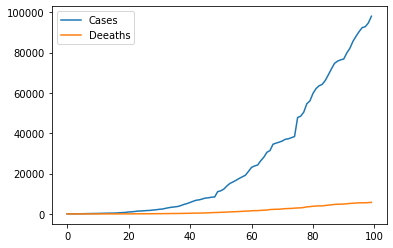

In [64]:
df_correlation_ce.plot()

In [65]:
df_correlation_ce.corr(method="pearson")

,Cases,Deeaths
Cases,1.000000,0.998128
Deeaths,0.998128,1.000000


**Como os dados para cada estado são diferentes, pode haver coeficientes de correlação diferentes.**

Nesse caso, o coeficiente de correlação entre casos e mortes para o estado do Ceará é um pouco mais elevado que o de São Paulo. 

In [66]:
confirmed_ce = ce_confirmed['CE'].values
confirmed

array([     1,      1,      1,      2,      2,      2,      2,      2,
            3,      6,     10,     13,     16,     16,     19,     30,
           46,     46,     65,     65,    152,    164,    240,    286,
          396,    396,    631,    745,    810,    862,   1052,   1223,
         1406,   1451,   1517,   2339,   2981,   3506,   4048,   4466,
         4620,   4866,   5682,   6708,   7480,   8216,   8419,   8755,
         8895,   9371,  11043,  11568,  12841,  13894,  14267,  14580,
        15385,  15914,  16740,  17826,  20004,  20715,  21696,  24041,
        26158,  28698,  30374,  31174,  31772,  32187,  34053,  37853,
        39928,  41830,  44411,  45444,  46131,  47719,  51097,  54286,
        58378,  61183,  62345,  63066,  65995,  69859,  73739,  76871,
        80558,  82161,  83625,  86017,  89483,  95865, 101556, 107142,
       109698, 111296, 118295, 123483, 129200, 134565, 140549, 143073,
       144593, 150138, 156316, 162520, 167900, 172875])

In [68]:
deaths_ce = ce_deaths['CE'].values
deaths_ce

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    3,
          3,    4,    5,    5,    7,    9,   21,   22,   23,   35,   35,
         40,   57,   57,   67,   74,   76,  101,  111,  124,  135,  155,
        180,  189,  206,  221,  239,  271,  293,  326,  376,  397,  417,
        450,  492,  539,  638,  677,  712,  795,  849,  903,  997, 1062,
       1114, 1189, 1280, 1389, 1413, 1566, 1614, 1641, 1748, 1856, 1900,
       2161, 2251, 2308, 2324, 2493, 2603, 2671, 2733, 2859, 2956, 3010,
       3188, 3504, 3605, 3813, 3907, 3965, 3982, 4192, 4359, 4519, 4708,
       4812, 4829, 4885, 5041, 5192, 5307, 5393, 5497, 5520, 5523, 5618,
       5728])

In [69]:
#Método que retorna o coeficiente de correlação de Pearson e o p-Value.
stats.pearsonr(confirmed_ce, deaths_ce)

(0.9981282683754831, 9.473198959999842e-121)

**Para Finalizar este Estudo, podemos utilizar um outro método de cálculo do coeficiente, como o de Spearman.**

In [70]:
#Método de Correlação de Spearman Relação monotônica entre as variáveis 
stats.spearmanr(confirmed_ce, deaths_ce)

SpearmanrResult(correlation=0.9994928206794979, pvalue=1.5974343006921372e-148)